# Import Dependencies

In [1]:
import pandas as pd

# Load Data

In [2]:
df = pd.read_csv('nbaPlayers.csv')

df

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
0,Alaa Abdelnaby|abdelal01,1991,1995,F-C,6-10,240.0,June 24 1968,Duke
1,Zaid Abdul-Aziz|abdulza01,1969,1978,C-F,6-9,235.0,April 7 1946,Iowa State
2,Kareem Abdul-Jabbar*|abdulka01,1970,1989,C,7-2,225.0,April 16 1947,UCLA
3,Mahmoud Abdul-Rauf|abdulma02,1991,2001,G,6-1,162.0,March 9 1969,LSU
4,Tariq Abdul-Wahad|abdulta01,1998,2003,F,6-6,223.0,November 3 1974,Michigan San Jose State
...,...,...,...,...,...,...,...,...
4873,Ante Žižić|zizican01,2018,2020,F-C,6-10,266.0,January 4 1997,NaN
4874,Jim Zoet|zoetji01,1983,1983,C,7-1,240.0,December 20 1953,Kent State University
4875,Bill Zopf|zopfbi01,1971,1971,G,6-1,170.0,June 7 1948,Duquesne
4876,Ivica Zubac|zubaciv01,2017,2021,C,7-0,240.0,March 18 1997,NaN


# Preprocess Data

In [3]:
# Get number of years played as new column
df['Years Played'] = df.apply(lambda row: row.To - row.From, axis=1)

# Convert height from Feet to CM
def convertHeight(row):
    height_in_feet = row['Ht']
    height_in_cm = ((float(height_in_feet[0]) * 12) + float(height_in_feet[2:])) * 2.54
    return height_in_cm

df['Height(cm)'] = df.apply(lambda row: convertHeight(row), axis=1)

df

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Years Played,Height(cm)
0,Alaa Abdelnaby|abdelal01,1991,1995,F-C,6-10,240.0,June 24 1968,Duke,4,208.28
1,Zaid Abdul-Aziz|abdulza01,1969,1978,C-F,6-9,235.0,April 7 1946,Iowa State,9,205.74
2,Kareem Abdul-Jabbar*|abdulka01,1970,1989,C,7-2,225.0,April 16 1947,UCLA,19,218.44
3,Mahmoud Abdul-Rauf|abdulma02,1991,2001,G,6-1,162.0,March 9 1969,LSU,10,185.42
4,Tariq Abdul-Wahad|abdulta01,1998,2003,F,6-6,223.0,November 3 1974,Michigan San Jose State,5,198.12
...,...,...,...,...,...,...,...,...,...,...
4873,Ante Žižić|zizican01,2018,2020,F-C,6-10,266.0,January 4 1997,NaN,2,208.28
4874,Jim Zoet|zoetji01,1983,1983,C,7-1,240.0,December 20 1953,Kent State University,0,215.90
4875,Bill Zopf|zopfbi01,1971,1971,G,6-1,170.0,June 7 1948,Duquesne,0,185.42
4876,Ivica Zubac|zubaciv01,2017,2021,C,7-0,240.0,March 18 1997,NaN,4,213.36


In [4]:
# Get active players
active_players_df = df[df['To'] == 2021]

active_players_df

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Years Played,Height(cm)
10,Precious Achiuwa|achiupr01,2021,2021,F,6-8,225.0,September 19 1999,Memphis,0,203.20
20,Jaylen Adams|adamsja01,2019,2021,G,6-0,225.0,May 4 1996,St. Bonaventure,2,182.88
23,Steven Adams|adamsst01,2014,2021,C,6-11,265.0,July 20 1993,Pitt,7,210.82
25,Bam Adebayo|adebaba01,2018,2021,C-F,6-9,255.0,July 18 1997,Kentucky,3,205.74
44,LaMarcus Aldridge|aldrila01,2007,2021,F-C,6-11,250.0,July 19 1985,Texas,14,210.82
...,...,...,...,...,...,...,...,...,...,...
4823,Delon Wright|wrighde01,2016,2021,G,6-5,185.0,April 26 1992,Utah,5,195.58
4854,Thaddeus Young|youngth01,2008,2021,F,6-8,235.0,June 21 1988,Georgia Tech,13,203.20
4856,Trae Young|youngtr01,2019,2021,G,6-1,180.0,September 19 1998,Oklahoma,2,185.42
4860,Cody Zeller|zelleco01,2014,2021,C-F,6-11,240.0,October 5 1992,Indiana,7,210.82


In [5]:
# Get active players with at least 1 years experience
experienced_players = active_players_df[active_players_df['Years Played'] >= 1]

experienced_players

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Years Played,Height(cm)
20,Jaylen Adams|adamsja01,2019,2021,G,6-0,225.0,May 4 1996,St. Bonaventure,2,182.88
23,Steven Adams|adamsst01,2014,2021,C,6-11,265.0,July 20 1993,Pitt,7,210.82
25,Bam Adebayo|adebaba01,2018,2021,C-F,6-9,255.0,July 18 1997,Kentucky,3,205.74
44,LaMarcus Aldridge|aldrila01,2007,2021,F-C,6-11,250.0,July 19 1985,Texas,14,210.82
54,Nickeil Alexander-Walker|alexani01,2020,2021,G,6-6,205.0,September 2 1998,Virginia Tech,1,198.12
...,...,...,...,...,...,...,...,...,...,...
4823,Delon Wright|wrighde01,2016,2021,G,6-5,185.0,April 26 1992,Utah,5,195.58
4854,Thaddeus Young|youngth01,2008,2021,F,6-8,235.0,June 21 1988,Georgia Tech,13,203.20
4856,Trae Young|youngtr01,2019,2021,G,6-1,180.0,September 19 1998,Oklahoma,2,185.42
4860,Cody Zeller|zelleco01,2014,2021,C-F,6-11,240.0,October 5 1992,Indiana,7,210.82


In [6]:
experienced_players.to_csv('experienced_players.csv')

In [7]:
# Remove usernames of players
def remove_slugs(row):
    name = row['Player']
    name = name.split("|")[0]
    return name
    
experienced_players['Player'] = experienced_players.apply(lambda row: remove_slugs(row), axis=1)
experienced_players

<ipython-input-7-a5fed35f497e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experienced_players['Player'] = experienced_players.apply(lambda row: remove_slugs(row), axis=1)


,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Years Played,Height(cm)
20,Jaylen Adams,2019,2021,G,6-0,225.0,May 4 1996,St. Bonaventure,2,182.88
23,Steven Adams,2014,2021,C,6-11,265.0,July 20 1993,Pitt,7,210.82
25,Bam Adebayo,2018,2021,C-F,6-9,255.0,July 18 1997,Kentucky,3,205.74
44,LaMarcus Aldridge,2007,2021,F-C,6-11,250.0,July 19 1985,Texas,14,210.82
54,Nickeil Alexander-Walker,2020,2021,G,6-6,205.0,September 2 1998,Virginia Tech,1,198.12
...,...,...,...,...,...,...,...,...,...,...
4823,Delon Wright,2016,2021,G,6-5,185.0,April 26 1992,Utah,5,195.58
4854,Thaddeus Young,2008,2021,F,6-8,235.0,June 21 1988,Georgia Tech,13,203.20
4856,Trae Young,2019,2021,G,6-1,180.0,September 19 1998,Oklahoma,2,185.42
4860,Cody Zeller,2014,2021,C-F,6-11,240.0,October 5 1992,Indiana,7,210.82


# Working with basketball-reference-scraper API

In [8]:
from basketball_reference_scraper.players import get_stats

## Testing API

In [9]:
# Convert to list and use with basketball_reference_scraper
names = experienced_players['Player'].to_list()

try:
    player_df = get_stats(names[30])
except AttributeError:
    #Didn't work
    print(names[16])
    
#player_df['FT%'].mean()
#player_df

You searched for "Jordan Bell"
10 results found.
0: Jordan Bell
1: Jordan Hill
2: Jordan Bone
3: Jordan Ford
4: Jordan Loyd
5: Jordan Poole
6: Jordan Sibert
7: Jordan Bowden
8: Ryan Kelly
9: Jordan McRae
Results for Jordan Bell:



## Add Career Free Throw Pct to experienced_players Dataframe

In [10]:
experienced_players.insert(10, 'FT Pct', 0)

In [11]:
experienced_players

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Years Played,Height(cm),FT Pct
20,Jaylen Adams,2019,2021,G,6-0,225.0,May 4 1996,St. Bonaventure,2,182.88,0
23,Steven Adams,2014,2021,C,6-11,265.0,July 20 1993,Pitt,7,210.82,0
25,Bam Adebayo,2018,2021,C-F,6-9,255.0,July 18 1997,Kentucky,3,205.74,0
44,LaMarcus Aldridge,2007,2021,F-C,6-11,250.0,July 19 1985,Texas,14,210.82,0
54,Nickeil Alexander-Walker,2020,2021,G,6-6,205.0,September 2 1998,Virginia Tech,1,198.12,0
...,...,...,...,...,...,...,...,...,...,...,...
4823,Delon Wright,2016,2021,G,6-5,185.0,April 26 1992,Utah,5,195.58,0
4854,Thaddeus Young,2008,2021,F,6-8,235.0,June 21 1988,Georgia Tech,13,203.20,0
4856,Trae Young,2019,2021,G,6-1,180.0,September 19 1998,Oklahoma,2,185.42,0
4860,Cody Zeller,2014,2021,C-F,6-11,240.0,October 5 1992,Indiana,7,210.82,0


In [12]:
players_left = []

def get_avg_ft_pct(row):
    player = row['Player']
    ft_avg = 0
    try:
        player_stats = get_stats(player)
        ft_avg = player_stats['FT%'].mean()
    except:
        players_left.append(player)
        ft_avg = 'N/A'
    return ft_avg

experienced_players['FT Pct'] = experienced_players.apply(lambda row: get_avg_ft_pct(row), axis=1)
experienced_players

You searched for "Jaylen Adams"
6 results found.
0: Jaylen Adams
1: Alvan Adams
2: Hassan Adams
3: Jordan Adams
4: Steven Adams
5: Jaylen Hoard
Results for Jaylen Adams:

You searched for "Steven Adams"
6 results found.
0: Steven Adams
1: Alvan Adams
2: Jaylen Adams
3: Steven Kramer
4: Steve Hamer
5: Steve Nash
Results for Steven Adams:

You searched for "Bam Adebayo"
1 result found.
Bam Adebayo
Results for Bam Adebayo:

You searched for "LaMarcus Aldridge"
1 result found.
LaMarcus Aldridge
Results for LaMarcus Aldridge:

You searched for "Nickeil Alexander-Walker"
1 result found.
Nickeil Alexander-Walker
Results for Nickeil Alexander-Walker:

You searched for "Grayson Allen"
2 results found.
0: Grayson Allen
1: Ray Allen
Results for Grayson Allen:

You searched for "Jarrett Allen"
2 results found.
0: Jarrett Allen
1: Jarrett Culver
Results for Jarrett Allen:

You searched for "Kyle Anderson"
16 results found.
0: Kyle Anderson
1: Kim Anderson
2: Ryan Anderson
3: Alan Anderson
4: Dan An

You searched for "Sterling Brown"
1 result found.
Sterling Brown
Results for Sterling Brown:

You searched for "Troy Brown"
26 results found.
0: Troy Brown
1: Tony Brown
2: Bob Brown
3: Fred Brown
4: Larry Brown
5: Leon Brown
6: Myron Brown
7: Roy Ebron
8: Troy Bell
9: Anthony Brown
10: Bobby Brown
11: Bruce Brown
12: Dee Brown
13: Dee Brown
14: Harold Brown
15: John Brown
16: Mike Brown
17: P.J. Brown
18: Randy Brown
19: Roger Brown
20: Roger Brown
21: Stan Brown
22: Tierre Brown
23: Ron Rowan
24: Ron Boone
25: Trey Burke
Results for Troy Brown:

You searched for "Jalen Brunson"
1 result found.
Jalen Brunson
Results for Jalen Brunson:

You searched for "Thomas Bryant"
2 results found.
0: Thomas Bryant
1: Thomas Jordan
Results for Thomas Bryant:

You searched for "Reggie Bullock"
1 result found.
Reggie Bullock
Results for Reggie Bullock:

You searched for "Trey Burke"
5 results found.
0: Trey Burke
1: Pat Burke
2: Alec Burks
3: Corey Beck
4: Troy Bell
Results for Trey Burke:

You searc

You searched for "Terrance Ferguson"
1 result found.
Terrance Ferguson
Results for Terrance Ferguson:

You searched for "Bruno Fernando"
1 result found.
Bruno Fernando
Results for Bruno Fernando:

You searched for "Yogi Ferrell"
1 result found.
Yogi Ferrell
Results for Yogi Ferrell:

You searched for "Dorian Finney-Smith"
1 result found.
Dorian Finney-Smith
Results for Dorian Finney-Smith:

You searched for "Bryn Forbes"
2 results found.
0: Bryn Forbes
1: Gary Forbes
Results for Bryn Forbes:

You searched for "Evan Fournier"
2 results found.
0: Evan Fournier
1: Evan Turner
Results for Evan Fournier:

You searched for "De'Aaron Fox"
1 result found.
De'Aaron Fox
Results for De'Aaron Fox:

You searched for "Tim Frazier"
4 results found.
0: Tim Frazier
1: Will Frazier
2: Jim Farmer
3: Walt Frazier
Results for Tim Frazier:

You searched for "Markelle Fultz"
1 result found.
Markelle Fultz
Results for Markelle Fultz:

You searched for "Daniel Gafford"
1 result found.
Daniel Gafford
Results fo

You searched for "Talen Horton-Tucker"
1 result found.
Talen Horton-Tucker
Results for Talen Horton-Tucker:

You searched for "Danuel House"
2 results found.
0: Danuel House
1: Daniel Theis
Results for Danuel House:

You searched for "Dwight Howard"
2 results found.
0: Dwight Howard
1: Dwight Powell
Results for Dwight Howard:

You searched for "Kevin Huerter"
5 results found.
0: Kevin Huerter
1: Kevin Hervey
2: Kevin Porter
3: Kevin Porter
4: Kevin Kunnert
Results for Kevin Huerter:

You searched for "De'Andre Hunter"
1 result found.
De'Andre Hunter
Results for De'Andre Hunter:

You searched for "Chandler Hutchison"
1 result found.
Chandler Hutchison
Results for Chandler Hutchison:

You searched for "Serge Ibaka"
1 result found.
Serge Ibaka
Results for Serge Ibaka:

You searched for "Andre Iguodala"
1 result found.
Andre Iguodala
Results for Andre Iguodala:

You searched for "Joe Ingles"
7 results found.
0: Joe Ingles
1: Joe Ellis
2: Joe Fulks
3: Joe Reaves
4: Joe Binion
5: Jack Tingle

You searched for "Nassir Little"
1 result found.
Nassir Little
Results for Nassir Little:

You searched for "Kevon Looney"
5 results found.
0: Kevon Looney
1: Kevin Jones
2: Kevin Loder
3: Kevin Love
4: Devon Dotson
Results for Kevon Looney:

You searched for "Brook Lopez"
4 results found.
0: Brook Lopez
1: Raul Lopez
2: Robin Lopez
3: Brook Steppe
Results for Brook Lopez:

You searched for "Robin Lopez"
4 results found.
0: Robin Lopez
1: Robin Jones
2: Brook Lopez
3: Raul Lopez
Results for Robin Lopez:

You searched for "Kevin Love"
15 results found.
0: Kevin Love
1: Kevin Loder
2: Kevin Jones
3: Kevin Joyce
4: Kevin Ollie
5: Kevin Grevey
6: Kevin Hervey
7: Kevin Knox
8: Kevon Looney
9: Stan Love
10: Kevin Lynch
11: Kevin Porter
12: Kevin Porter
13: Kelvin Cato
14: Melvin Ely
Results for Kevin Love:

You searched for "Kyle Lowry"
4 results found.
0: Kyle Lowry
1: Kyle Guy
2: Kyle Macy
3: Kyle Korver
Results for Kyle Lowry:

You searched for "Timothé Luwawu-Cabarrot"
1 result found.
Ti

You searched for "Kelly Oubre"
1 result found.
Kelly Oubre
Results for Kelly Oubre:

You searched for "Eric Paschall"
1 result found.
Eric Paschall
Results for Eric Paschall:

You searched for "Anžejs Pasečņiks"
1 result found.
Anzejs Pasecniks
Results for Anzejs Pasecniks:

You searched for "Patrick Patterson"
1 result found.
Patrick Patterson
Results for Patrick Patterson:

You searched for "Chris Paul"
15 results found.
0: Chris Paul
1: Chris Babb
2: Chris Carr
3: Chris Taft
4: Chris Bosh
5: Chris Ford
6: Chris Jent
7: Chris Kaman
8: Chris King
9: Chris Mihm
10: Chris Mills
11: Chris Munk
12: Charlie Paulk
13: Chris Welp
14: Chris Silva
Results for Chris Paul:

You searched for "Cameron Payne"
2 results found.
0: Cameron Payne
1: Aron Baynes
Results for Cameron Payne:

You searched for "Elfrid Payton"
1 result found.
Elfrid Payton
Results for Elfrid Payton:

You searched for "Theo Pinson"
2 results found.
0: Theo Pinson
1: Fred Vinson
Results for Theo Pinson:

You searched for "Maso

You searched for "Jeff Teague"
7 results found.
0: Jeff Teague
1: Jeff Slade
2: Jeff Ayres
3: Jeff Turner
4: Jeff Foster
5: Jeff Green
6: Jeff Withey
Results for Jeff Teague:

You searched for "Garrett Temple"
1 result found.
Garrett Temple
Results for Garrett Temple:

You searched for "Daniel Theis"
4 results found.
0: Daniel Theis
1: Daniel Ochefu
2: Daniel Oturu
3: Daniel Orton
Results for Daniel Theis:

You searched for "Matt Thomas"
15 results found.
0: Matt Thomas
1: Matt Guokas
2: Matt Guokas
3: Carl Thomas
4: Kurt Thomas
5: Etan Thomas
6: Jamel Thomas
7: James Thomas
8: Jim Thomas
9: Joe Thomas
10: John Thomas
11: Lance Thomas
12: Tim Thomas
13: Matt Mazza
14: Matt Othick
Results for Matt Thomas:

You searched for "Tristan Thompson"
1 result found.
Tristan Thompson
Results for Tristan Thompson:

You searched for "Sindarius Thornwell"
1 result found.
Sindarius Thornwell
Results for Sindarius Thornwell:

You searched for "Matisse Thybulle"
1 result found.
Matisse Thybulle
Results

<ipython-input-12-1e329a1e49c7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experienced_players['FT Pct'] = experienced_players.apply(lambda row: get_avg_ft_pct(row), axis=1)


,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Years Played,Height(cm),FT Pct
20,Jaylen Adams,2019,2021,G,6-0,225.0,May 4 1996,St. Bonaventure,2,182.88,0.778
23,Steven Adams,2014,2021,C,6-11,265.0,July 20 1993,Pitt,7,210.82,0.550625
25,Bam Adebayo,2018,2021,C-F,6-9,255.0,July 18 1997,Kentucky,3,205.74,0.75
44,LaMarcus Aldridge,2007,2021,F-C,6-11,250.0,July 19 1985,Texas,14,210.82,0.7994
54,Nickeil Alexander-Walker,2020,2021,G,6-6,205.0,September 2 1998,Virginia Tech,1,198.12,0.7295
...,...,...,...,...,...,...,...,...,...,...,...
4823,Delon Wright,2016,2021,G,6-5,185.0,April 26 1992,Utah,5,195.58,0.793375
4854,Thaddeus Young,2008,2021,F,6-8,235.0,June 21 1988,Georgia Tech,13,203.20,0.645875
4856,Trae Young,2019,2021,G,6-1,180.0,September 19 1998,Oklahoma,2,185.42,0.856333
4860,Cody Zeller,2014,2021,C-F,6-11,240.0,October 5 1992,Indiana,7,210.82,0.731375


##### The API used to collect the data was not able to get the Free Throw Percentage of all active and experienced players. Players that were left out were stored in a list. These players' Free Throw Percentage will be retrieved from the website (basketball-reference.com) and added manually.

In [13]:
len(players_left)

30

In [14]:
players_left

['Marvin Bagley',
 'Mohamed Bamba',
 'Patrick Beverley',
 'Bojan Bogdanović',
 'Troy Brown',
 'Clint Capela',
 'Wendell Carter',
 'Joel Embiid',
 'Danilo Gallinari',
 'Marc Gasol',
 'Jeff Green',
 'Blake Griffin',
 'Tim Hardaway',
 'Serge Ibaka',
 'Derrick Jones',
 'Maxi Kleber',
 "E'Twaun Moore",
 'Frank Ntilikina',
 "Royce O'Neale",
 'Cedi Osman',
 'Kelly Oubre',
 'Michael Porter',
 'Derrick Rose',
 'Ricky Rubio',
 "D'Angelo Russell",
 'Ben Simmons',
 'Dennis Smith',
 'Garrett Temple',
 'P.J. Tucker',
 'Hassan Whiteside']

# Drop unneccessary columns

In [15]:
columns_to_drop = ['From', 'To', 'Pos', 'Ht', 'Wt', 'Birth Date', 'Colleges']
required_data = experienced_players.drop(columns=columns_to_drop)

In [16]:
required_data

,Player,Years Played,Height(cm),FT Pct
20,Jaylen Adams,2,182.88,0.778
23,Steven Adams,7,210.82,0.550625
25,Bam Adebayo,3,205.74,0.75
44,LaMarcus Aldridge,14,210.82,0.7994
54,Nickeil Alexander-Walker,1,198.12,0.7295
...,...,...,...,...
4823,Delon Wright,5,195.58,0.793375
4854,Thaddeus Young,13,203.20,0.645875
4856,Trae Young,2,185.42,0.856333
4860,Cody Zeller,7,210.82,0.731375


# Generate graph

In [17]:
#required_data.to_csv('required_data.csv')

In [25]:
data_df = pd.read_csv('required_data.csv')

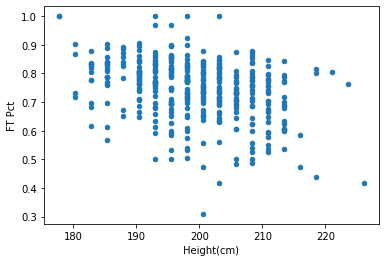

In [26]:
ax1 = data_df.plot.scatter(x='Height(cm)', y='FT Pct')

# Calculating Pearson Product-Moment Correlation Coefficient

In [32]:
# Get Covariance of both variables

height_and_ft_df = data_df.drop(columns=['Unnamed: 0', 'Player', 'Years Played'])

height_and_ft_df.cov()

,Height(cm),FT Pct
Height(cm),76.344942,-0.315670
FT Pct,-0.315670,0.010744


In [35]:
# We know that the covariance of the two variables is -0.315670
covariance_x_y = -0.315670

In [33]:
# Get standard deviation of each variable
height_and_ft_df.std()

Height(cm)    8.737559
FT Pct        0.103652
dtype: float64

In [34]:
standard_deviation_x = 8.737559
standard_deviation_y = 0.103652

In [36]:
# Plug in calculated values into correlation formula
coefficient = covariance_x_y / (standard_deviation_x * standard_deviation_y)

coefficient

-0.34855033346874775